## 1) Import Dependencies

In [25]:
import os
from enum import Enum
import seaborn as sns
from pydantic import BaseModel
from dotenv import load_dotenv
import numpy as np # alias
import groq
import pandas as pd # alias
import matplotlib.pyplot as plt

load_dotenv()

True

## 2.Basic Processing

In [26]:
df=pd.read_csv("data\\processed\\ChurnModelling_Missing_Values_Handled.csv")
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [27]:
print(len(df)) # No of Rows of Dataset

10000


In [28]:
# 2 Types of Categorical Variables
    # 1) Ordinal
    # 2) Nominal

# Geography -->Nominal
# Gender-->Nominal  

#CreditScore,Age,Balance,EstimatedSalary,Tenure,NumofProducts-->Numerical Variables
#hasCrCard,IsActiveMember-->not Numerical/


## 3.Outlier Detection Techniques

### 3.1 Distribution Plots

In [29]:
categorical_columns=['Geography','Gender','HasCrCard','IsActiveMember','Exited']

numerical_columns= ['Age', 'Tenure', 'CreditScore', 
                    'Balance', 'EstimatedSalary',"NumOfProducts"]

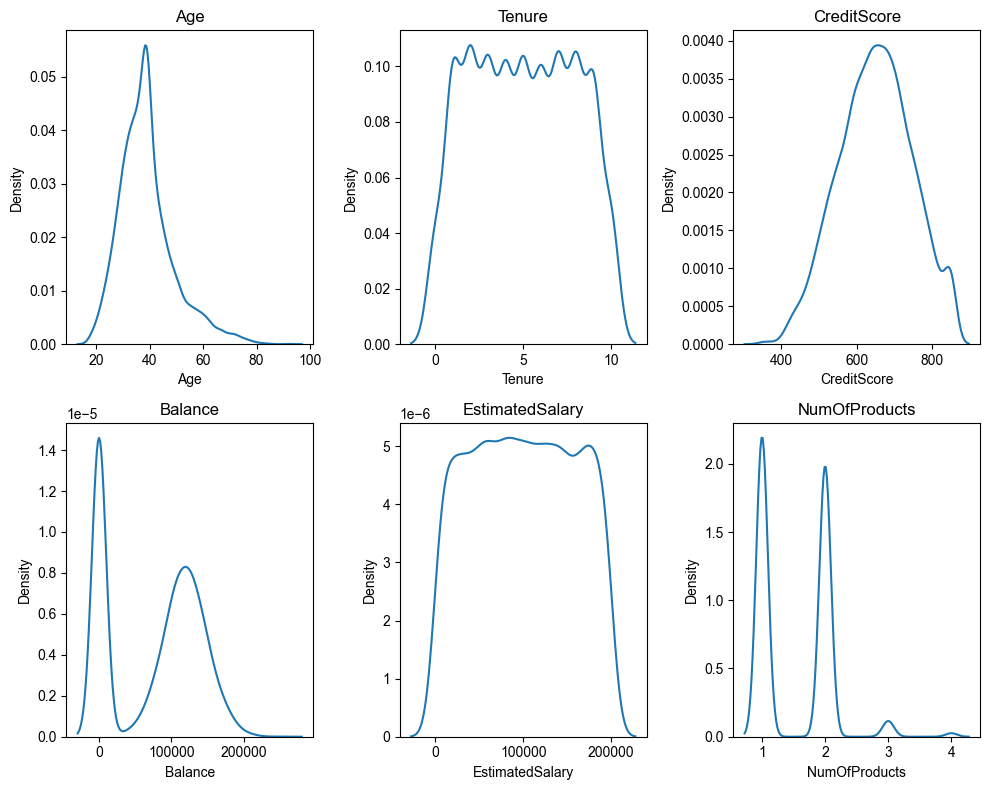

In [34]:
fig,axes=plt.subplots(2,3,figsize=(10,8))
axes=axes.flatten()
for idx,col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col],ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
plt.tight_layout()
plt.show()

c:\Users\Hp\anaconda30\envs\bprmls1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36884 (\N{CJK UNIFIED IDEOGRAPH-9014}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Hp\anaconda30\envs\bprmls1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28459 (\N{CJK UNIFIED IDEOGRAPH-6F2B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Hp\anaconda30\envs\bprmls1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20237 (\N{CJK UNIFIED IDEOGRAPH-4F0D}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


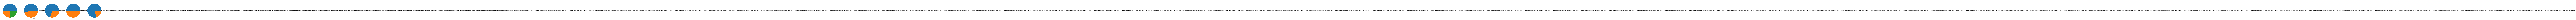

In [ ]:
import math

n = len(categorical_columns)
# Lay out subplots in a grid so each plot gets more space (max 3 columns)
ncols = min(3, n)
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), constrained_layout=True)
# flatten axes to simplify indexing
if hasattr(axes, "flatten"):
    axes = axes.flatten()
else:
    axes = [axes]

for idx, col in enumerate(categorical_columns):
    ax = axes[idx]
    counts = df[col].value_counts()
    if counts.sum() == 0:
        ax.text(0.5, 0.5, 'No data', ha='center')
        ax.set_title(col)
        ax.set_axis_off()
        continue

    counts.plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,
        labeldistance=1.05,
        wedgeprops=dict(width=0.6)
    )
    ax.set_ylabel('')
    ax.set_title(col)
    ax.set_aspect('equal')

# hide any unused axes
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()